In [215]:
from bs4 import BeautifulSoup
import re
import requests
import pandas as pd
import numpy as np
import os
from csv import writer
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium.webdriver.support.ui import Select
import time
import json
import urllib
from csv import DictWriter
                      
from sklearn import linear_model
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


In [216]:
PATH = "C:/Program Files (x86)/chromedriver.exe"
dataPath = 'data/'

In [217]:
#df_2020 = pd.DataFrame()
df_2019 = pd.DataFrame()
df_2018 = pd.DataFrame()
df_2017 = pd.DataFrame()
df_2016 = pd.DataFrame()

dic_years = {'2019':df_2019, '2018':df_2018, '2017':df_2017, '2016':df_2016} 

In [218]:
#/////////////////////fix duplicates columns////////////////////////////////////////////////////////////////////////////////

def get_tables():
    i = 0
    arr = []
    driver.execute_script("""
    document.querySelectorAll("a[aria-hidden=true],span[aria-hidden=true]").forEach(function(e) {
        e.parentElement.removeChild(e);
    });
    """)
    time.sleep(5)
    temp_html = driver.find_element(By.CSS_SELECTOR, "html").get_attribute('outerHTML')
    df_school = pd.read_html(temp_html, attrs = {'class':'zebraTable ng-scope'})[0]
    for columns in df_school:
        arr.append(df_school.columns[i][0])
        i = i + 1
    df_school.columns = arr
    return df_school

In [219]:
def GetYearsDemography(fileName,url):
    try:
        driver.get(url)
        driver.implicitly_wait(20)
        driver.maximize_window()
        selectSubtext = driver.find_element(By.ID, "select2-chosen-4")
        selectSubtext.click()
        driver.find_element(By.XPATH, "//*[@id=\"select2-results-4\"]/li[" + "7" + "]").click()
        time.sleep(10)
        selectCity = driver.find_element(By.ID, "select2-chosen-8")
        selectCity.click()
        time.sleep(1)
        options = driver.find_element(By.XPATH, "//*[@id=\"select2-results-8\"]")
        AllOpt = options.find_elements_by_css_selector("li")

        countOpt=len(AllOpt)
        driver.find_element(By.XPATH, "//*[@id=\"select2-results-8\"]/li[" + "1" + "]").click()

        dfData = pd.DataFrame()
        firstTime = True
        for i in range(1, countOpt):

            driver.find_element(By.ID, "select2-chosen-4").click()
            driver.find_element(By.XPATH, "//*[@id=\"select2-results-4\"]/li[" + "7" + "]").click()
            selectCity = driver.find_element(By.ID, "select2-chosen-8")
            selectCity.click()
            driver.find_element(By.XPATH, "//*[@id=\"select2-results-8\"]/li[" + str(i) + "]").click()
            year = selectCity.text
            temp = get_tables()
            temp.insert(0, "Years", year, True)
            print(temp)
            dfData = dfData.append(temp, ignore_index=True)
            if firstTime:
                temp.to_csv(fileName, mode='a', encoding='utf-8-sig',index=False)
                firstTime = False
            else:
                temp.to_csv(fileName, mode='a', encoding='utf-8-sig',index=False, header=False)


    except BaseException as e:
        print("Invalid URL")
    driver.quit()
    return dfData


In [220]:
#/////////////education status//////////////////////////////////////////////////////////////////////////////////////////////

options = webdriver.ChromeOptions() 
options.add_argument("--enable-webgl-developer-extensions") 
options.add_argument("--enable-webgl-draft-extensions") 
driver = webdriver.Chrome(PATH,options=options)
driver.vars = {}
url = "https://boardsgenerator.cbs.gov.il/pages/WebParts/YishuvimPage.aspx?level_1=%D7%A9%D7%9B%D7%A8%20/%20%D7%94%D7%9B%D7%A0%D7%A1%D7%95%D7%AA"
driver.get(url)
element = driver.find_element(By.ID, "select2-chosen-4")
actions = ActionChains(driver)
actions.move_to_element(element).perform()
element = driver.find_element(By.CSS_SELECTOR, "body")
actions = ActionChains(driver)
actions.move_to_element(element).perform()
element = driver.find_element(By.ID, "select2-chosen-4")
actions = ActionChains(driver)
actions.move_to_element(element).click_and_hold().perform()
element = driver.find_element(By.ID, "select2-drop-mask")
actions = ActionChains(driver)
actions.move_to_element(element).release().perform()
driver.find_element(By.XPATH, "//*[@id=\"select2-results-4\"]/li[10]").click()
time.sleep(5)
for i in range(2, 6):
    selectCity = driver.find_element(By.ID, "select2-chosen-8")
    selectCity.click()
    time.sleep(10)
    driver.find_element(By.XPATH, "//*[@id=\"select2-results-8\"]/li[" + str(i) + "]").click()
    time.sleep(10)
    df_temp = get_tables()
    year = selectCity.text
    #print(year)
    dic_years[year] = df_temp
    
    dic_years[year].insert(0, "year", year, True)
driver.quit()
dic_years[year]

,year,סמל היישוב,שם יישוב,"ילדים בגנים של משרד החינוך סה""כ תשע""ו 2015/16","ילדים בגנים של משרד החינוך גיל 3 תשע""ו 2015/16","ילדים בגנים של משרד החינוך גיל 4 תשע""ו 2015/16","ילדים בגנים של משרד החינוך גיל 5 תשע""ו 2015/16","ילדים בגנים של משרד החינוך גיל 6 תשע""ו 2015/16","בתי ספר סה""כ תשע""ו 2015/16","בתי ספר יסודיים (כולל חינוך מיוחד) תשע""ו 2015/16",...,"תלמידים בבתי ספר על-יסודיים תשע""ו 2015/16","תלמידים בחטיבות ביניים תשע""ו 2015/16","תלמידים בבתי ספר תיכוניים תשע""ו 2015/16","ממוצע תלמידים לכיתה סה""כ תשע""ו 2015/16","ממוצע תלמידים לכיתה בבתי ספר יסודיים (כולל חינוך מיוחד) תשע""ו 2015/16","ממוצע תלמידים לכיתה בבתי ספר על-יסודיים תשע""ו 2015/16","ממוצע תלמידים לכיתה בחטיבות ביניים תשע""ו 2015/16","ממוצע תלמידים לכיתה בבתי ספר תיכוניים תשע""ו 2015/16","אחוז זכאים לתעודת בגרות מבין תלמידי כיתות יב תשע""ו 2015/16","אחוז זכאים לתעודת בגרות שעמדו בדרישות הסף של האוניברסיטאות מבין תלמידי כיתות יב תשע""ו 2015/16"
0,2016,472,אבו גוש,375,148,113,112,..,5,4,...,700,323,377,20.00,19.00,20.00,27,16.00,49.20,35.80
1,2016,473,אבו סנאן,670,224,207,230,9,6,4,...,1384,723,661,23.00,22.00,25.00,26,24.00,56.10,39.20
2,2016,182,אבן יהודה,740,215,244,255,26,8,6,...,1906,613,1293,28.00,27.00,31.00,34,29.00,81.10,71.70
3,2016,2710,אום אל-פחם,3588,1151,1144,1183,110,29,18,...,7292,3563,3729,25.79,24.85,26.81,29,25.20,52.90,32.40
4,2016,31,אופקים,1754,566,553,525,110,25,18,...,1978,582,1396,20.42,19.95,21.27,22,20.84,51.70,34.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,2016,538,שעב,427,149,148,127,3,3,..,...,756,427,329,25.00,24.00,26.00,27,25.00,64,52.30
197,2016,8800,שפרעם,2012,634,665,676,37,24,15,...,4238,1853,2385,26.14,25.56,26.82,29,25.11,47.70,41.20
198,2016,5000,תל אביב -יפו,17327,5168,5786,5733,640,163,103,...,23370,10333,13037,24.03,23.63,24.57,27,22.87,74,65.40
199,2016,154,תל מונד,625,171,200,223,31,5,4,...,1751,725,1026,31.00,28.00,35.00,38,33.00,89.40,84.30


In [221]:
df_years_temp = pd.DataFrame(columns=['year', 'city', 'number_of_high_schools', 'number_of_bachelor_graduates_in_percent', 'number_of_high_school_graduates_in_percent', 'number_of_high_school_students', 'number_of_high_school_graduates_with_potential_in_percent', 'Registration_for_higher_education_within_8_years_in_percent', 'number_of_graduates_students_in_percent'])
df_education = pd.DataFrame()
for i in dic_years:
    #print(i)
    if(i == '2015'):
        break
    df_temp = dic_years[i]
    df_years_temp['year'] = df_temp.iloc[:,0].values
    df_years_temp['city'] = df_temp.iloc[:,2].values
    df_years_temp['number_of_high_schools'] =  df_temp.iloc[:,12].values
    df_years_temp['number_of_bachelor_graduates_in_percent'] = df_temp.iloc[:,29].values
    df_years_temp['number_of_high_school_graduates_with_potential_in_percent'] = df_temp.iloc[:,28].values
    df_years_temp['number_of_high_school_graduates_in_percent'] = df_temp.iloc[:,27].values
    df_years_temp['number_of_high_school_students'] = df_temp.iloc[:,22].values
    if(i != '2016'):
        df_years_temp['Registration_for_higher_education_within_8_years_in_percent'] = df_temp.iloc[:,30].values
        df_years_temp['number_of_graduates_students_in_percent'] = df_temp.iloc[:,32].values
    df_education = df_education.append(df_years_temp)
df_education.to_csv(dataPath + 'dfEducation.csv', mode='w+', encoding='utf-8-sig',index=False)    
df_education

C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1486897665.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_education = df_education.append(df_years_temp)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1486897665.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_education = df_education.append(df_years_temp)


,year,city,number_of_high_schools,number_of_bachelor_graduates_in_percent,number_of_high_school_graduates_in_percent,number_of_high_school_students,number_of_high_school_graduates_with_potential_in_percent,Registration_for_higher_education_within_8_years_in_percent,number_of_graduates_students_in_percent
0,2019,אבו גוש,3,13.03,59.29,361,37.17,..,3.74
1,2019,אבו סנאן,3,12.09,65.81,592,52.56,28.50,2.32
2,2019,אבן יהודה,3,55.59,83.96,1087,76.89,46.10,3.03
3,2019,אום אל-פחם,13,8.52,59.40,3838,44.16,23.30,2.11
4,2019,אופקים,11,12.26,50.24,1551,39.81,26.60,1.84
...,...,...,...,...,...,...,...,...,...
196,2016,שעב,..,52.30,25.0,329,64,8.5,14.40
197,2016,שפרעם,9,41.20,25.11,2385,47.70,9.7,11.90
198,2016,תל אביב -יפו,64,65.40,22.87,13037,74,41.1,20.80
199,2016,תל מונד,..,84.30,33.0,1026,89.40,51.3,13.60


In [222]:
options = webdriver.ChromeOptions() 
options.add_argument("--enable-webgl-developer-extensions") 
options.add_argument("--enable-webgl-draft-extensions") 
driver = webdriver.Chrome(PATH,options=options)
driver.vars = {}
url = "https://boardsgenerator.cbs.gov.il/pages/WebParts/YishuvimPage.aspx?level_1=%D7%A9%D7%9B%D7%A8%20/%20%D7%94%D7%9B%D7%A0%D7%A1%D7%95%D7%AA"
driver.get(url)
time.sleep(2)
element = driver.find_element(By.ID, "select2-chosen-4")
actions = ActionChains(driver)
time.sleep(2)
actions.move_to_element(element).perform()
element = driver.find_element(By.CSS_SELECTOR, "body")
actions = ActionChains(driver)
actions.move_to_element(element).perform()
element = driver.find_element(By.ID, "select2-chosen-4")
actions = ActionChains(driver)
time.sleep(2)
actions.move_to_element(element).click_and_hold().perform()
element = driver.find_element(By.ID, "select2-drop-mask")
actions = ActionChains(driver)
time.sleep(2)
actions.move_to_element(element).release().perform()
driver.find_element(By.XPATH, "//*[@id=\"select2-results-4\"]/li[8]").click()
time.sleep(5)
for i in range(1, 6):
    selectCity = driver.find_element(By.ID, "select2-chosen-8")
    selectCity.click()
    time.sleep(10)
    driver.find_element(By.XPATH, "//*[@id=\"select2-results-8\"]/li[" + str(i) + "]").click()
    time.sleep(12)
    df_temp = get_tables()
    year = selectCity.text
    #print(year)
    dic_years[year] = df_temp
    dic_years[year].insert(0, "year", year, True)
driver.quit()
dic_years[year]

,year,סמל היישוב,שם יישוב,"שכר ממוצע לחודש של שכירים (ש""ח) כלל השכירים","שכר ממוצע לחודש של שכירים (ש""ח) גברים","שכר ממוצע לחודש של שכירים (ש""ח) נשים",אחוז שינוי ריאלי לעומת השנה הקודמת של שכר ממוצע לחודש של שכירים כלל השכירים,אחוז שינוי ריאלי לעומת השנה הקודמת של שכר ממוצע לחודש של שכירים גברים,אחוז שינוי ריאלי לעומת השנה הקודמת של שכר ממוצע לחודש של שכירים נשים,מספר השכירים,אחוז השכירים המשתכרים עד שכר מינימום,מספר העצמאים,"הכנסה ממוצעת לחודש של העצמאים (ש""ח)",אחוז שינוי ריאלי של הכנסה ממוצעת לחודש של העצמאים לעומת השנה הקודמת,אחוז העצמאים המשתכרים עד מחצית השכר הממוצע,"מדד אי-השוויון שכירים (מדד ג'יני, 0 שוויון מלא)"
0,2015,472,אבו גוש,6275.59,6928.63,5240.03,4.7,3.9,6.3,2728,42.2,130,6656.52,-0.8,53.1,0.34
1,2015,473,אבו סנאן,6060.40,7314.21,4302.60,4.3,5.3,2.3,4900,49.7,435,7940.37,9.8,44.6,0.39
2,2015,182,אבן יהודה,13502.86,16816.52,10097.43,5.2,3.6,5.7,6077,27.6,660,12913.98,-1.3,32.3,0.48
3,2015,2710,אום אל-פחם,5289.00,6096.00,3811.00,3.0,2.4,5.9,16739,56.9,1487,7864.00,3.0,44.5,0.38
4,2015,31,אופקים,9496.00,12155.00,7006.00,6.4,6.7,5.0,2967,38.1,231,9128.00,19.6,39.4,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2015,538,שעב,5312.02,6020.50,4112.21,4.7,4.1,6.9,2443,52.6,150,6452.12,3.8,60.0,0.35
220,2015,8800,שפרעם,6142.00,7286.00,4489.00,3.7,4.8,2.2,15471,48.8,1109,8546.00,7.1,41.8,0.38
221,2015,5000,תל אביב -יפו,10808.00,12888.00,8667.00,5.8,6.0,4.5,224083,31.9,23222,11685.00,6.2,37.5,0.47
222,2015,154,תל מונד,14056.74,17904.35,10202.37,4.1,4.3,2.9,5699,28.5,603,13015.24,5.9,31.0,0.50


In [223]:
df_employees_info = pd.DataFrame()
df_years_temp = pd.DataFrame(columns=['year', 'city','number_of_self_employees', 'number_of_employees', 'employees_average_monthly_wage', 'employees_average_monthly_wage_change_in_percent', 'self_employees_average_monthly_wage'])
for i in dic_years:
    #print(i)
    if(i == '2015'):
        break
    df_temp = dic_years[i]
    df_years_temp['year'] = df_temp.iloc[:,0].values
    df_years_temp['city'] = df_temp.iloc[:,2].values
    df_years_temp['number_of_self_employees'] =  df_temp.iloc[:,11].values
    df_years_temp['number_of_employees'] = df_temp.iloc[:,9].values
    df_years_temp['employees_average_monthly_wage'] = df_temp.iloc[:,3].values
    df_years_temp['employees_average_monthly_wage_change_in_percent'] = df_temp.iloc[:,6].values
    df_years_temp['self_employees_average_monthly_wage'] = df_temp.iloc[:,12].values
    df_employees_info = df_employees_info.append(df_years_temp)

# drop שעב 2016 row/////////////////////////////////////////////////         
df_employees_info.drop
df_employees_info.drop(df_employees_info.index[219], inplace=True)
#//////////////////////////////////////////////////////////////////
        
    
df_employees_info.to_csv(dataPath + 'dfEmployees.csv', mode='w+', encoding='utf-8-sig',index=False)
df_employees_info

C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1373717995.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_employees_info = df_employees_info.append(df_years_temp)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1373717995.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_employees_info = df_employees_info.append(df_years_temp)


,year,city,number_of_self_employees,number_of_employees,employees_average_monthly_wage,employees_average_monthly_wage_change_in_percent,self_employees_average_monthly_wage
0,2019,אבו גוש,151,3393,7294.03,1.35,10064.79
1,2019,אבו סנאן,626,5841,7071.17,1.95,8456.80
2,2019,אבן יהודה,899,6265,14054.00,1.58,12517.09
3,2019,אום אל-פחם,1918,22149,5869.82,1.16,8883.18
4,2019,אופקים,295,3342,9398.05,0.38,11301.74
...,...,...,...,...,...,...,...
218,2016,שלומי,218,3157,8164.68,1.59,10706.09
220,2016,שפרעם,1161,16307,6236.00,2.00,8996.00
221,2016,תל אביב -יפו,24447,223935,11017.00,2.50,11908.00
222,2016,תל מונד,660,5819,13983.03,-0.02,13735.86


In [313]:

df_education = pd.read_csv(dataPath + 'dfEducation.csv')
df_employees_info = pd.read_csv(dataPath + 'dfEmployees.csv')

df_eduoEmplo = [df_education, df_employees_info]
df_eduoEmplo = pd.merge(df_education, df_employees_info,  how='left', left_on=['year','city'], right_on = ['year','city'])
df_eduoEmplo


,year,city,number_of_high_schools,number_of_bachelor_graduates_in_percent,number_of_high_school_graduates_in_percent,number_of_high_school_students,number_of_high_school_graduates_with_potential_in_percent,Registration_for_higher_education_within_8_years_in_percent,number_of_graduates_students_in_percent,number_of_self_employees,number_of_employees,employees_average_monthly_wage,employees_average_monthly_wage_change_in_percent,self_employees_average_monthly_wage
0,2019,אבו גוש,3,13.03,59.29,361,37.17,..,3.74,151.0,3393.0,7294.03,1.35,10064.79
1,2019,אבו סנאן,3,12.09,65.81,592,52.56,28.50,2.32,626.0,5841.0,7071.17,1.95,8456.80
2,2019,אבן יהודה,3,55.59,83.96,1087,76.89,46.10,3.03,899.0,6265.0,14054.00,1.58,12517.09
3,2019,אום אל-פחם,13,8.52,59.40,3838,44.16,23.30,2.11,1918.0,22149.0,5869.82,1.16,8883.18
4,2019,אופקים,11,12.26,50.24,1551,39.81,26.60,1.84,295.0,3342.0,9398.05,0.38,11301.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,2016,שעב,..,52.30,25.0,329,64,8.5,14.40,NaN,NaN,NaN,NaN,NaN
800,2016,שפרעם,9,41.20,25.11,2385,47.70,9.7,11.90,1161.0,16307.0,6236.00,2.00,8996.00
801,2016,תל אביב -יפו,64,65.40,22.87,13037,74,41.1,20.80,24447.0,223935.0,11017.00,2.50,11908.00
802,2016,תל מונד,..,84.30,33.0,1026,89.40,51.3,13.60,660.0,5819.0,13983.03,-0.02,13735.86


In [314]:
fileName= dataPath + 'YearsDemography.csv'

if os.path.isfile(fileName):
    dfDemography = pd.read_csv(fileName)
else:
    url = "https://boardsgenerator.cbs.gov.il/pages/WebParts/YishuvimPage.aspx?level_1=%D7%A9%D7%9B%D7%A8%20/%20%D7%94%D7%9B%D7%A0%D7%A1%D7%95%D7%AA"
    driver = webdriver.Chrome(PATH)
    dfDemography = GetYearsDemography(fileName,url)
    
dfDemography

,Years,שם יישוב,סמל היישוב,"צפיפות אוכלוסייה לקמ''ר ביישובים שמנו 5,000 תושבים ויותר","סה""כ אוכלוסייה בסוף השנה",יהודים ואחרים (אחוזים),יהודים (אחוזים מתוך יהודים ואחרים),ערבים (אחוזים),מוסלמים (אחוזים מתוך האוכלוסייה הערבית),נוצרים (אחוזים מתוך האוכלוסייה הערבית),...,"נישאים שיעור ל-1,000 תושבים לא נשואים בני 15 ומעלה 2019","מתגרשים סה""כ גברים ונשים 2019","מתגרשים שיעור ל-1,000 תושבים נשואים בני 15 ומעלה 2019",אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) סך מוסדות דיור משותף ברשות,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) סך דיירי דיור משותף ברשות,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים בבתי אבות ובדיור מוגן,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים במוסדות חינוך,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים במוסדות דת,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים במוסדות אשפוז כולל הוסטלים,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים במוסדות אחרים
0,2020,אבו גוש,472,4114.4,7771.0,-,-,98.9,99.8,-,...,44.6,26,8.1,4,31,-,0.3,0.04,0.06,-
1,2020,אבו סנאן,473,2136.9,14306.0,-,-,99.8,54.6,15.2,...,42.2,29,4.7,-,-,-,-,-,-,-
2,2020,אבן יהודה,182,1696.2,14020.0,100,98.4,-,-,-,...,20,40,7,5,347,1.35,0.3,-,0.83,-
3,2020,אום אל-פחם,2710,2187.4,56777.0,-,-,99.9,100,-,...,53.7,104,4.5,..,..,..,..,..,..,..
4,2020,אופקים,31,1990.8,32555.0,99.3,93.4,-,-,-,...,44.5,119,10.7,6,559,0.87,0.58,0.17,-,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3592,2003,שעב,538,2.9,2.8,14.04,13.56,13.17,9.43,17.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3593,2003,שפרעם,8800,15.7,15.5,13.2,12.5,10.9,8.33,16.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3594,2003,תל אביב -יפו,5000,173.8,189.6,7,5.5,4.8,5.2,18.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3595,2003,תל מונד,154,4,3.9,11.43,10.62,9.73,7.77,12.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [315]:
dfDemography=dfDemography.rename(columns={"Years":"year"})
dfDemography=dfDemography.rename(columns={"שם יישוב":"city"})
dfDemography=dfDemography.rename(columns={'סה"כ אוכלוסייה בסוף השנה':"population"})
dfDemography=dfDemography.rename(columns={'אחוז באוכלוסייה בסוף השנה בני 19-15':"Percentage of population at the end of the year aged 19-15"})
dfDemography=dfDemography.rename(columns={'אחוז באוכלוסייה בסוף השנה בני 29-20':"Percentage of population at the end of the year aged 20-29"})
dfDemography=dfDemography.rename(columns={'אחוז באוכלוסייה בסוף השנה בני 44-30':"Percentage of population at the end of the year aged 30-44"})

dfYearsCityPop=dfDemography

populationList = dfYearsCityPop['population'].tolist()
for i in range(len(populationList)):
    if (populationList[i] <= 1000) :
            populationList[i] = populationList[i] * 1000

dfYearsCityPop['population'] = populationList
dfYearsCityPop.to_csv(dataPath + 'dfYearsCityPop.csv', mode='w+', encoding='utf-8-sig',index=False)
dfYearsCityPop

,year,city,סמל היישוב,"צפיפות אוכלוסייה לקמ''ר ביישובים שמנו 5,000 תושבים ויותר",population,יהודים ואחרים (אחוזים),יהודים (אחוזים מתוך יהודים ואחרים),ערבים (אחוזים),מוסלמים (אחוזים מתוך האוכלוסייה הערבית),נוצרים (אחוזים מתוך האוכלוסייה הערבית),...,"נישאים שיעור ל-1,000 תושבים לא נשואים בני 15 ומעלה 2019","מתגרשים סה""כ גברים ונשים 2019","מתגרשים שיעור ל-1,000 תושבים נשואים בני 15 ומעלה 2019",אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) סך מוסדות דיור משותף ברשות,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) סך דיירי דיור משותף ברשות,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים בבתי אבות ובדיור מוגן,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים במוסדות חינוך,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים במוסדות דת,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים במוסדות אשפוז כולל הוסטלים,אוכלוסיית דיור משותף (אחוז מתוך אוכלוסיית הרשות) אחוז דיירים במוסדות אחרים
0,2020,אבו גוש,472,4114.4,7771.0,-,-,98.9,99.8,-,...,44.6,26,8.1,4,31,-,0.3,0.04,0.06,-
1,2020,אבו סנאן,473,2136.9,14306.0,-,-,99.8,54.6,15.2,...,42.2,29,4.7,-,-,-,-,-,-,-
2,2020,אבן יהודה,182,1696.2,14020.0,100,98.4,-,-,-,...,20,40,7,5,347,1.35,0.3,-,0.83,-
3,2020,אום אל-פחם,2710,2187.4,56777.0,-,-,99.9,100,-,...,53.7,104,4.5,..,..,..,..,..,..,..
4,2020,אופקים,31,1990.8,32555.0,99.3,93.4,-,-,-,...,44.5,119,10.7,6,559,0.87,0.58,0.17,-,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3592,2003,שעב,538,2.9,2800.0,14.04,13.56,13.17,9.43,17.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3593,2003,שפרעם,8800,15.7,15500.0,13.2,12.5,10.9,8.33,16.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3594,2003,תל אביב -יפו,5000,173.8,189600.0,7,5.5,4.8,5.2,18.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3595,2003,תל מונד,154,4,3900.0,11.43,10.62,9.73,7.77,12.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [316]:
dfYearsCityPop = pd.read_csv(dataPath + 'dfYearsCityPop.csv')

Sum_filterdfDemograph =dfYearsCityPop.iloc[:, [16,17,18]]
Sum_filterdfDemograph['precent count Age 15-44 '] = Sum_filterdfDemograph.sum(axis=1, numeric_only= True)
Sum_filterdfDemograph.insert(loc=0, column='year', value=dfYearsCityPop['year'].values)
Sum_filterdfDemograph.insert(loc=1, column='city', value=dfYearsCityPop['city'].values)
Sum_filterdfDemograph.insert(loc=2, column='population', value=dfYearsCityPop['population'].values)

Sum_filterdfDemograph = Sum_filterdfDemograph.drop(columns=['Percentage of population at the end of the year aged 19-15'])
Sum_filterdfDemograph = Sum_filterdfDemograph.drop(columns=['Percentage of population at the end of the year aged 20-29'])
Sum_filterdfDemograph = Sum_filterdfDemograph.drop(columns=['Percentage of population at the end of the year aged 30-44'])
Sum_filterdfDemograph.columns = Sum_filterdfDemograph.columns.str.replace('precent count Age 15-44', 'percent_count_Age')
Sum_filterdfDemograph["percent_count_Age"]=Sum_filterdfDemograph.iloc[:,[3]].apply(pd.to_numeric)
Sum_filterdfDemograph=Sum_filterdfDemograph.iloc[:, [0,1,2,4]]
#final_DataFrame["percent_count_Age"]
Sum_filterdfDemograph

C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\2832977819.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sum_filterdfDemograph['precent count Age 15-44 '] = Sum_filterdfDemograph.sum(axis=1, numeric_only= True)


,year,city,population,percent_count_Age
0,2020,אבו גוש,7771.0,45.97
1,2020,אבו סנאן,14306.0,48.03
2,2020,אבן יהודה,14020.0,35.39
3,2020,אום אל-פחם,56777.0,47.55
4,2020,אופקים,32555.0,41.65
...,...,...,...,...
3592,2003,שעב,2800.0,342.00
3593,2003,שפרעם,15500.0,1692.00
3594,2003,תל אביב -יפו,189600.0,12676.00
3595,2003,תל מונד,3900.0,298.00


In [317]:
      
final_DataFrame = pd.merge(Sum_filterdfDemograph,df_eduoEmplo, how='inner', left_on=['year','city'], right_on = ['year','city'])

final_DataFrame.to_csv(dataPath + 'finalDataFrame.csv', mode='w+', encoding='utf-8-sig',index=False)  
final_DataFrame 


,year,city,population,percent_count_Age,number_of_high_schools,number_of_bachelor_graduates_in_percent,number_of_high_school_graduates_in_percent,number_of_high_school_students,number_of_high_school_graduates_with_potential_in_percent,Registration_for_higher_education_within_8_years_in_percent,number_of_graduates_students_in_percent,number_of_self_employees,number_of_employees,employees_average_monthly_wage,employees_average_monthly_wage_change_in_percent,self_employees_average_monthly_wage
0,2019,אבו גוש,7698.0,46.76,3,13.03,59.29,361,37.17,..,3.74,151.0,3393.0,7294.03,1.35,10064.79
1,2019,אבו סנאן,14099.0,48.24,3,12.09,65.81,592,52.56,28.50,2.32,626.0,5841.0,7071.17,1.95,8456.80
2,2019,אבן יהודה,13826.0,35.91,3,55.59,83.96,1087,76.89,46.10,3.03,899.0,6265.0,14054.00,1.58,12517.09
3,2019,אום אל-פחם,56109.0,47.45,13,8.52,59.40,3838,44.16,23.30,2.11,1918.0,22149.0,5869.82,1.16,8883.18
4,2019,אופקים,30662.0,41.68,11,12.26,50.24,1551,39.81,26.60,1.84,295.0,3342.0,9398.05,0.38,11301.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,2016,שעב,6700.0,39.50,..,52.30,25.0,329,64,8.5,14.40,NaN,NaN,NaN,NaN,NaN
800,2016,שפרעם,40500.0,36.90,9,41.20,25.11,2385,47.70,9.7,11.90,1161.0,16307.0,6236.00,2.00,8996.00
801,2016,תל אביב -יפו,438800.0,23.20,64,65.40,22.87,13037,74,41.1,20.80,24447.0,223935.0,11017.00,2.50,11908.00
802,2016,תל מונד,12200.0,33.10,..,84.30,33.0,1026,89.40,51.3,13.60,660.0,5819.0,13983.03,-0.02,13735.86


In [318]:
# def FillingAveValue(final_DataFrame):
#     final_DataFrame = pd.read_csv(dataPath + 'finalDataFrame.csv')
#     tempValue=-9999999999
#     final_DataFrame = final_DataFrame.drop(columns=['city'])

#     final_DataFrame = final_DataFrame.replace( '..', tempValue )
#     final_DataFrame = final_DataFrame.replace( 'NaN', tempValue )
#     final_DataFrame = final_DataFrame.replace( '-', tempValue )
#     final_DataFrame = final_DataFrame.astype(float)
#     final_DataFrame = final_DataFrame.replace( tempValue, np.nan)

#     for column in final_DataFrame:
#         #Finding the mean of the column having NaN
#         mean_value=final_DataFrame[column].mean()
#         if 'number_of_high_schools' in column:
#             final_DataFrame[column].fillna(value=0, inplace=True)
#             final_DataFrame[column] = final_DataFrame[column].astype(int)
#         else:
#             final_DataFrame[column].fillna(value=mean_value, inplace=True)
    
#     return final_DataFrame

# Filling average value instead of null cells

In [319]:
final_DataFrame = pd.read_csv('data/finalDataFrame.csv')

final_DataFrame = final_DataFrame.replace( '..', np.nan)
final_DataFrame = final_DataFrame.replace( '-', np.nan )

city = final_DataFrame[final_DataFrame['city'].str.contains('שוהם')]
city

,year,city,population,percent_count_Age,number_of_high_schools,number_of_bachelor_graduates_in_percent,number_of_high_school_graduates_in_percent,number_of_high_school_students,number_of_high_school_graduates_with_potential_in_percent,Registration_for_higher_education_within_8_years_in_percent,number_of_graduates_students_in_percent,number_of_self_employees,number_of_employees,employees_average_monthly_wage,employees_average_monthly_wage_change_in_percent,self_employees_average_monthly_wage
194,2019,שוהם,21045.0,40.45,2,59.41,91.91,1261,88.80,64.80,5.97,1030.0,11795.0,14543.86,1.66,14584.54
395,2018,שוהם,20990.0,40.60,2,89.16,30.67,1288,93.66,57.2,19.70,1011.0,11367.0,15412.68,0.73,14639.65
596,2017,שוהם,20900.0,37.80,NaN,86.60,30,1277,90.90,57.0,20.00,834.0,11081.0,15179.94,3.13,15495.02
797,2016,שוהם,20700.0,37.70,NaN,87.60,30.0,1286,91.40,57.0,20.00,833.0,10633.0,14689.71,0.26,14792.15


In [320]:
final_DataFrame = pd.read_csv('data/finalDataFrame.csv')
final_DataFrame
df_test = final_DataFrame
fixed_data = pd.DataFrame()

year_col = final_DataFrame['year']
city_col = final_DataFrame['city']
df_test = df_test.drop(columns=['city', 'year'])
df_test = df_test.replace( '..', np.nan )
df_test = df_test.replace( 'NaN', np.nan )
df_test = df_test.replace( '-', np.nan )
df_test = df_test.astype(float)
df_test.insert(loc=0, column='city', value=city_col)
df_test.insert(loc=0, column='year', value=year_col)
df_test
df_null_val=df_test[df_test.isna().any(axis=1)]
for cityName in df_null_val['city']:
    df_city = df_test[df_test['city'].str.contains(cityName)]
    df_city_fixed_mean = df_test[df_test['city'].str.contains(cityName)]  
    for column in df_city:
        if column != 'city' and df_city[column].isnull().any():
            df_city[column] = df_city[column].replace(np.nan, 0)
            mean_value = df_city[column].mean()
            df_city_fixed_mean[column].fillna(value=mean_value, inplace=True)
    fixed_data = fixed_data.append(df_city_fixed_mean)
    
fixed_data = fixed_data.drop(columns=['city'])
fixed_data = fixed_data.astype(int)
fixed_data = fixed_data.insert(loc=1, column='city', value=city_col)
pd.merge(df_test, fixed_data,  how='left', left_on=['year','city'], right_on = ['year','city'])
df_test

city = fixed_data['city'].str.contains('שוהם')
city
fixed_data
df_city_fixed_mean

C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city[column] = df_city[column].replace(np.nan, 0)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_fixed_mean[column].fillna(value=mean_value, inplace=True)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fixed_d

C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fixed_data = fixed_data.append(df_city_fixed_mean)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city[column] = df_city[column].replace(np.nan, 0)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_fixed_mean[col

C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fixed_data = fixed_data.append(df_city_fixed_mean)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city[column] = df_city[column].replace(np.nan, 0)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_fixed_mean[col

C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city[column] = df_city[column].replace(np.nan, 0)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_fixed_mean[column].fillna(value=mean_value, inplace=True)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fixed_d

C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_fixed_mean[column].fillna(value=mean_value, inplace=True)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fixed_data = fixed_data.append(df_city_fixed_mean)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city[c

C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city[column] = df_city[column].replace(np.nan, 0)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_fixed_mean[column].fillna(value=mean_value, inplace=True)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fixed_d

C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fixed_data = fixed_data.append(df_city_fixed_mean)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city[column] = df_city[column].replace(np.nan, 0)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_fixed_mean[col

C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fixed_data = fixed_data.append(df_city_fixed_mean)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city[column] = df_city[column].replace(np.nan, 0)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_fixed_mean[col

C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fixed_data = fixed_data.append(df_city_fixed_mean)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city[column] = df_city[column].replace(np.nan, 0)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_fixed_mean[col

C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fixed_data = fixed_data.append(df_city_fixed_mean)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city[column] = df_city[column].replace(np.nan, 0)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_fixed_mean[col

C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fixed_data = fixed_data.append(df_city_fixed_mean)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city[column] = df_city[column].replace(np.nan, 0)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_fixed_mean[col

C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_fixed_mean[column].fillna(value=mean_value, inplace=True)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fixed_data = fixed_data.append(df_city_fixed_mean)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city[c

C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_fixed_mean[column].fillna(value=mean_value, inplace=True)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fixed_data = fixed_data.append(df_city_fixed_mean)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city[c

C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fixed_data = fixed_data.append(df_city_fixed_mean)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city[column] = df_city[column].replace(np.nan, 0)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_fixed_mean[col

C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fixed_data = fixed_data.append(df_city_fixed_mean)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city[column] = df_city[column].replace(np.nan, 0)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_fixed_mean[col

C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city[column] = df_city[column].replace(np.nan, 0)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_fixed_mean[column].fillna(value=mean_value, inplace=True)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fixed_d

C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city[column] = df_city[column].replace(np.nan, 0)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_fixed_mean[column].fillna(value=mean_value, inplace=True)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fixed_d

C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city[column] = df_city[column].replace(np.nan, 0)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_fixed_mean[column].fillna(value=mean_value, inplace=True)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fixed_d

C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fixed_data = fixed_data.append(df_city_fixed_mean)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city[column] = df_city[column].replace(np.nan, 0)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_fixed_mean[col

C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_fixed_mean[column].fillna(value=mean_value, inplace=True)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fixed_data = fixed_data.append(df_city_fixed_mean)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city[c

C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_fixed_mean[column].fillna(value=mean_value, inplace=True)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fixed_data = fixed_data.append(df_city_fixed_mean)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city[c

C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fixed_data = fixed_data.append(df_city_fixed_mean)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city[column] = df_city[column].replace(np.nan, 0)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_fixed_mean[col

C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fixed_data = fixed_data.append(df_city_fixed_mean)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city[column] = df_city[column].replace(np.nan, 0)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_fixed_mean[col

C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city[column] = df_city[column].replace(np.nan, 0)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_fixed_mean[column].fillna(value=mean_value, inplace=True)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fixed_d

C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fixed_data = fixed_data.append(df_city_fixed_mean)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:18: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_city = df_test[df_test['city'].str.contains(cityName)]
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:19: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_city_fixed_mean = df_test[df_test['city'].str.contains(cityName)]
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fixed_data = fixed_data.append(df_city_fixed_mean)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city[column] = df_city[column].replace(np.nan, 0)
C:\Users\netanel.m\AppData\Local\Temp\ipykernel_22796\1571865809.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_fixed_mean[col

TypeError: Can only merge Series or DataFrame objects, a <class 'NoneType'> was passed

In [391]:
def FillingAveValue(final_DataFrame):
    final_DataFrame = pd.read_csv(dataPath + 'finalDataFrame.csv')
    final_DataFrame = final_DataFrame.drop(columns=['city'])
    final_DataFrame = final_DataFrame.replace( '..', np.nan)
    final_DataFrame = final_DataFrame.replace( '-', np.nan )
    final_DataFrame = final_DataFrame.replace( 'NaN', np.nan )
    final_DataFrame = final_DataFrame.astype(float)

    for column in final_DataFrame:
        #Finding the mean of the column having NaN
        mean_value=final_DataFrame[column].mean()
        if 'number_of_high_schools' in column:
            final_DataFrame[column].fillna(value=0, inplace=True)
            final_DataFrame[column] = final_DataFrame[column].astype(int)
        else:
            final_DataFrame[column].fillna(value=mean_value, inplace=True)
            
    final_DataFrame.insert(loc=1, column='city', value=city_col)

    return final_DataFrame

In [392]:
final_DataFrame=FillingAveValue(final_DataFrame)
#final_DataFrame.to_csv(dataPath + 'finalDataFrame.csv', mode='w+', encoding='utf-8-sig',index=False)
final_DataFrame

,year,city,population,percent_count_Age,number_of_high_schools,number_of_bachelor_graduates_in_percent,number_of_high_school_graduates_in_percent,number_of_high_school_students,number_of_high_school_graduates_with_potential_in_percent,Registration_for_higher_education_within_8_years_in_percent,number_of_graduates_students_in_percent,number_of_self_employees,number_of_employees,employees_average_monthly_wage,employees_average_monthly_wage_change_in_percent,self_employees_average_monthly_wage
0,2019.0,אבו גוש,7698.0,46.76,3,13.03,59.29,361.0,37.17,24.730698,3.74,151.0000,3393.000,7294.030000,1.350000,10064.7900
1,2019.0,אבו סנאן,14099.0,48.24,3,12.09,65.81,592.0,52.56,28.500000,2.32,626.0000,5841.000,7071.170000,1.950000,8456.8000
2,2019.0,אבן יהודה,13826.0,35.91,3,55.59,83.96,1087.0,76.89,46.100000,3.03,899.0000,6265.000,14054.000000,1.580000,12517.0900
3,2019.0,אום אל-פחם,56109.0,47.45,13,8.52,59.40,3838.0,44.16,23.300000,2.11,1918.0000,22149.000,5869.820000,1.160000,8883.1800
4,2019.0,אופקים,30662.0,41.68,11,12.26,50.24,1551.0,39.81,26.600000,1.84,295.0000,3342.000,9398.050000,0.380000,11301.7400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,2016.0,שעב,6700.0,39.50,0,52.30,25.00,329.0,64.00,8.500000,14.40,1421.6925,17520.195,8712.128312,2.974587,9856.2883
800,2016.0,שפרעם,40500.0,36.90,9,41.20,25.11,2385.0,47.70,9.700000,11.90,1161.0000,16307.000,6236.000000,2.000000,8996.0000
801,2016.0,תל אביב -יפו,438800.0,23.20,64,65.40,22.87,13037.0,74.00,41.100000,20.80,24447.0000,223935.000,11017.000000,2.500000,11908.0000
802,2016.0,תל מונד,12200.0,33.10,0,84.30,33.00,1026.0,89.40,51.300000,13.60,660.0000,5819.000,13983.030000,-0.020000,13735.8600


### Basic data visulaization for hints on regression

First, we will start with initial description of the data (do you know what command?) and then will do some visualization

In [393]:
visul_df = final_DataFrame
visul_df = visul_df.drop(columns=['year'])
visul_df.describe()

,population,percent_count_Age,number_of_high_schools,number_of_bachelor_graduates_in_percent,number_of_high_school_graduates_in_percent,number_of_high_school_students,number_of_high_school_graduates_with_potential_in_percent,Registration_for_higher_education_within_8_years_in_percent,number_of_graduates_students_in_percent,number_of_self_employees,number_of_employees,employees_average_monthly_wage,employees_average_monthly_wage_change_in_percent,self_employees_average_monthly_wage
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,39324.470149,37.894104,8.283582,48.372570,34.882713,2000.064901,66.194815,24.730698,11.022052,1421.692500,17520.195000,8712.128312,2.974587,9856.288300
std,83457.188613,7.007393,26.689986,22.733819,22.687231,4529.734574,17.444660,15.771142,6.920867,3056.171239,33949.089253,2883.723014,2.644749,2307.799327
min,1200.000000,19.370000,0.000000,0.700000,0.000000,0.000000,1.300000,1.800000,0.430000,24.000000,704.000000,4612.000000,-9.030000,5077.940000
25%,7522.500000,33.137500,0.000000,32.950000,23.432500,475.000000,57.075000,11.500000,4.670000,244.000000,3433.000000,6457.195000,1.277500,8254.975000
50%,17001.000000,38.510000,3.000000,51.395000,27.000000,967.000000,68.105000,20.500000,11.150000,584.000000,6383.000000,7826.000000,2.690000,9416.880000
75%,38164.500000,42.357500,7.000000,63.585000,34.882713,2000.064901,78.387500,35.800000,15.025000,1195.500000,17167.250000,10498.452500,4.490000,11185.992500
max,936425.000000,52.960000,353.000000,94.400000,96.830000,58932.000000,98.300000,69.100000,52.900000,32674.000000,331224.000000,17941.350000,15.650000,21871.110000


In [394]:
# final_DataFrame = pd.read_csv('data/finalDataFrame.csv')
final_DataFrame

,year,city,population,percent_count_Age,number_of_high_schools,number_of_bachelor_graduates_in_percent,number_of_high_school_graduates_in_percent,number_of_high_school_students,number_of_high_school_graduates_with_potential_in_percent,Registration_for_higher_education_within_8_years_in_percent,number_of_graduates_students_in_percent,number_of_self_employees,number_of_employees,employees_average_monthly_wage,employees_average_monthly_wage_change_in_percent,self_employees_average_monthly_wage
0,2019.0,אבו גוש,7698.0,46.76,3,13.03,59.29,361.0,37.17,24.730698,3.74,151.0000,3393.000,7294.030000,1.350000,10064.7900
1,2019.0,אבו סנאן,14099.0,48.24,3,12.09,65.81,592.0,52.56,28.500000,2.32,626.0000,5841.000,7071.170000,1.950000,8456.8000
2,2019.0,אבן יהודה,13826.0,35.91,3,55.59,83.96,1087.0,76.89,46.100000,3.03,899.0000,6265.000,14054.000000,1.580000,12517.0900
3,2019.0,אום אל-פחם,56109.0,47.45,13,8.52,59.40,3838.0,44.16,23.300000,2.11,1918.0000,22149.000,5869.820000,1.160000,8883.1800
4,2019.0,אופקים,30662.0,41.68,11,12.26,50.24,1551.0,39.81,26.600000,1.84,295.0000,3342.000,9398.050000,0.380000,11301.7400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,2016.0,שעב,6700.0,39.50,0,52.30,25.00,329.0,64.00,8.500000,14.40,1421.6925,17520.195,8712.128312,2.974587,9856.2883
800,2016.0,שפרעם,40500.0,36.90,9,41.20,25.11,2385.0,47.70,9.700000,11.90,1161.0000,16307.000,6236.000000,2.000000,8996.0000
801,2016.0,תל אביב -יפו,438800.0,23.20,64,65.40,22.87,13037.0,74.00,41.100000,20.80,24447.0000,223935.000,11017.000000,2.500000,11908.0000
802,2016.0,תל מונד,12200.0,33.10,0,84.30,33.00,1026.0,89.40,51.300000,13.60,660.0000,5819.000,13983.030000,-0.020000,13735.8600


In [395]:

def generateGragh(columnsName,color1,color2):
    x = reshapeCol(final_DataFrame,columnsName)
    plt.scatter(x=x,y=y,c=color1,marker='s',label=columnsName)
    m = lr.fit(X=x, y=y)
    plt.plot(x,m.predict(x),color2,linewidth=3)

In [396]:
def reshapeCol(final_DataFrame,str):
  return final_DataFrame[[str]].values.reshape(final_DataFrame[str].shape[0],1)  

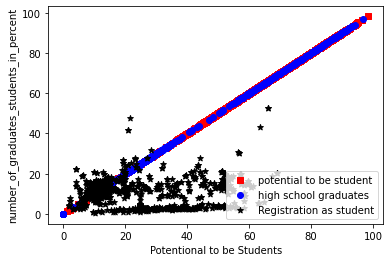

In [397]:
number_of_high_school_graduates_with_potential_in_percent='number_of_high_school_graduates_with_potential_in_percent'
number_of_high_school_graduates_in_percent='number_of_high_school_graduates_in_percent'
Registration_for_higher_education_within_8_years_in_percent='Registration_for_higher_education_within_8_years_in_percent'

plt.scatter(x=final_DataFrame[number_of_high_school_graduates_with_potential_in_percent],y=final_DataFrame['number_of_high_school_graduates_with_potential_in_percent'],c='r',marker='s',label='potential to be student')
plt.scatter(x=final_DataFrame[number_of_high_school_graduates_in_percent],y=final_DataFrame['number_of_high_school_graduates_in_percent'],c='b',marker='o',label='high school graduates')
plt.scatter(x=final_DataFrame[Registration_for_higher_education_within_8_years_in_percent],y=final_DataFrame['number_of_graduates_students_in_percent'],c='k',marker='*',label='Registration as student')

plt.legend(numpoints=1,loc=4)
plt.xlabel('Potentional to be Students')
plt.ylabel('number_of_graduates_students_in_percent')
plt.show()

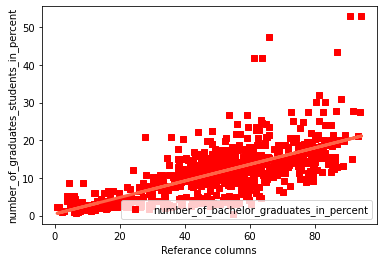

In [398]:

columns_names =['number_of_bachelor_graduates_in_percent', 'number_of_high_school_graduates_in_percent', 'Registration_for_higher_education_within_8_years_in_percent', 'number_of_graduates_students_in_percent']


number_of_students='number_of_graduates_students_in_percent'

number_of_bachelor_graduates_in_percent='number_of_bachelor_graduates_in_percent'

lr = linear_model.LinearRegression() # create a linear regression object

y = final_DataFrame[[number_of_students]].values.reshape(final_DataFrame[number_of_students].shape[0],1)


generateGragh(number_of_bachelor_graduates_in_percent,'r','tomato')

#take all columns for next blocks
x = final_DataFrame[['number_of_bachelor_graduates_in_percent']]


m = lr.fit(X=x, y=y);

plt.legend(numpoints=1,loc=4)
plt.xlabel('Referance columns')
plt.ylabel(number_of_students)
plt.show()


In [399]:
print("Slope: ",m.coef_)
print("intercept: ",m.intercept_)
print("R2: ", m.score(x,y))

Slope:  [[0.21907929]]
intercept:  [0.4246239]
R2:  0.5178767320769515


In [400]:
def sse(Y, Y_HAT):  
    sse = sum([(y - y_hat)**2 for y,y_hat in zip(Y, Y_HAT)])
    return sse

# print(final_DataFrame.iloc[:,0:1])
SSE = sse(final_DataFrame.number_of_bachelor_graduates_in_percent.tolist(),m.predict(final_DataFrame.iloc[:,0:1]).flatten())

print(SSE)

125256861.84814054


C:\Users\netanel.m\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- year
Feature names seen at fit time, yet now missing:
- number_of_bachelor_graduates_in_percent

  warnings.warn(message, FutureWarning)


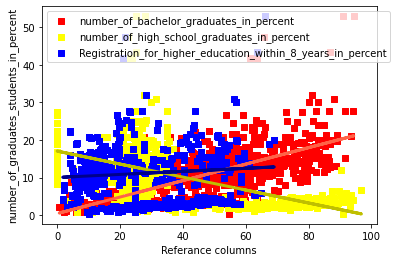

In [341]:
#/////////////////////////////////////////test 1////////////////////////////////////////////////////


columns_names =['number_of_bachelor_graduates_in_percent', 'number_of_high_school_graduates_in_percent', 'Registration_for_higher_education_within_8_years_in_percent', 'number_of_graduates_students_in_percent']


number_of_students='number_of_graduates_students_in_percent'

number_of_bachelor_graduates_in_percent='number_of_bachelor_graduates_in_percent'
number_of_high_school_graduates_in_percent='number_of_high_school_graduates_in_percent'
Registration_for_higher_education_within_8_years_in_percent='Registration_for_higher_education_within_8_years_in_percent'

lr = linear_model.LinearRegression() # create a linear regression object

y = final_DataFrame[[number_of_students]].values.reshape(final_DataFrame[number_of_students].shape[0],1)


generateGragh(number_of_bachelor_graduates_in_percent,'r','tomato')
generateGragh(number_of_high_school_graduates_in_percent,'yellow','y')
generateGragh(Registration_for_higher_education_within_8_years_in_percent,'blue','darkblue')


#take all columns for next blocks
x = final_DataFrame[['number_of_bachelor_graduates_in_percent', 'number_of_high_school_graduates_in_percent', 'Registration_for_higher_education_within_8_years_in_percent']]


m = lr.fit(X=x, y=y);

plt.legend(numpoints=1,loc=2)
plt.xlabel('Referance columns')
plt.ylabel(number_of_students)
plt.show()

In [342]:
print("R2:",lr.score(x,y))
print("R2:",r2_score(y,lr.predict(x)))

R2: 0.5900176076939934
R2: 0.5900176076939934


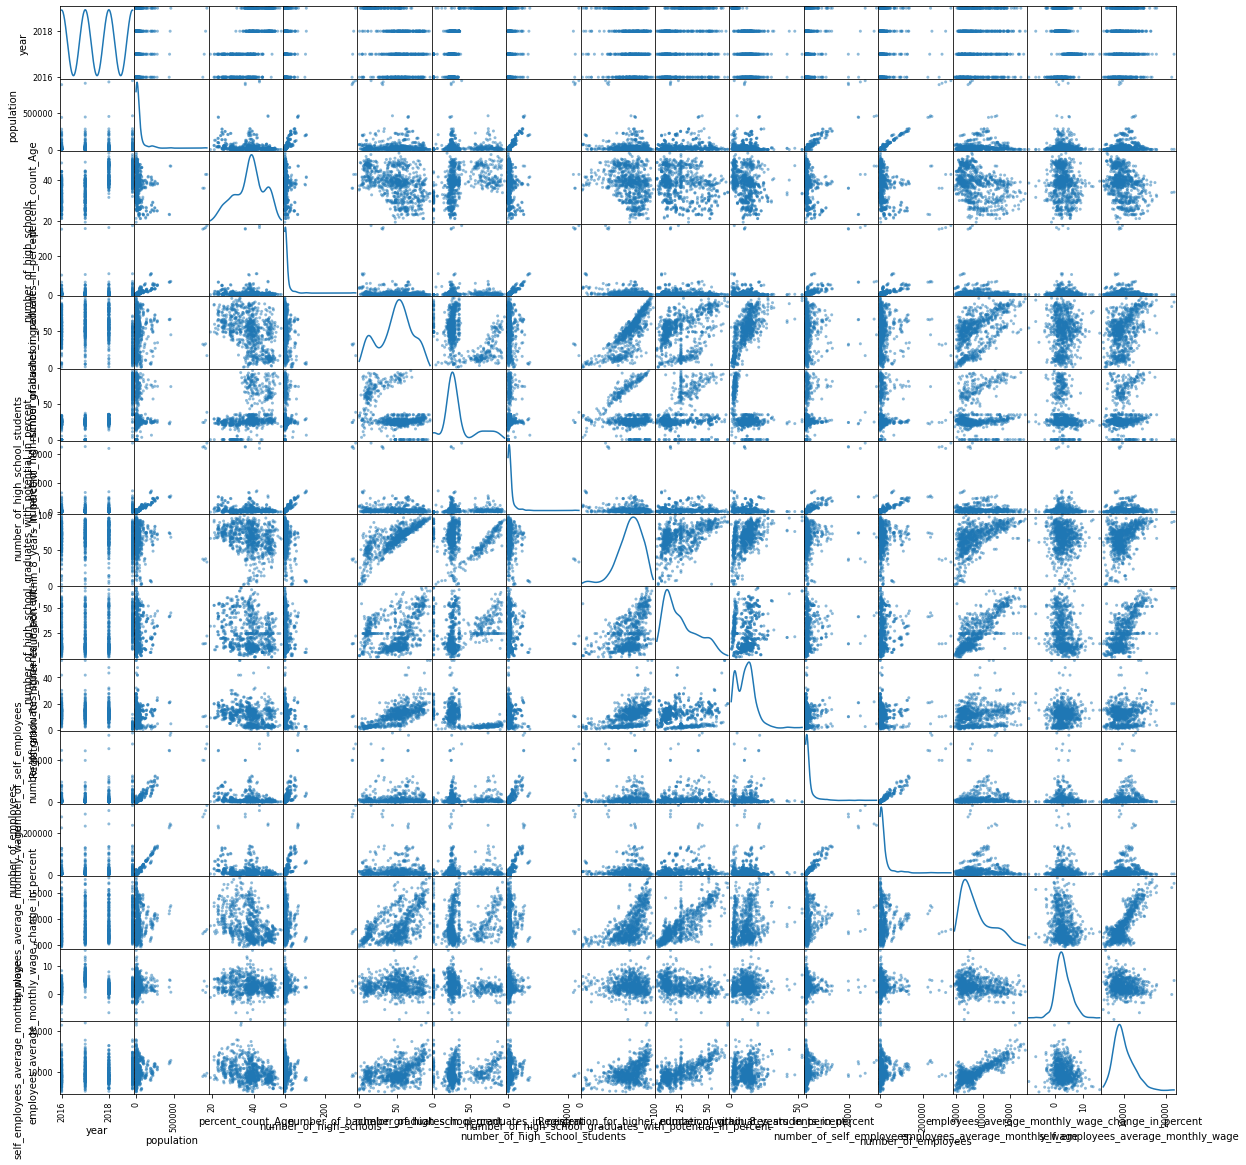

In [343]:
#print(final_DataFrame.corr())
pd.plotting.scatter_matrix(final_DataFrame, figsize=(20,20), diagonal='kde')
plt.show()

In [363]:
final_DataFrame=FillingAveValue(final_DataFrame)
final_DataFrame

,year,city,population,percent_count_Age,number_of_high_schools,number_of_bachelor_graduates_in_percent,number_of_high_school_graduates_in_percent,number_of_high_school_students,number_of_high_school_graduates_with_potential_in_percent,Registration_for_higher_education_within_8_years_in_percent,number_of_graduates_students_in_percent,number_of_self_employees,number_of_employees,employees_average_monthly_wage,employees_average_monthly_wage_change_in_percent,self_employees_average_monthly_wage
0,2019.0,אבו גוש,7698.0,46.76,3,13.03,59.29,361.0,37.17,24.730698,3.74,151.0000,3393.000,7294.030000,1.350000,10064.7900
1,2019.0,אבו סנאן,14099.0,48.24,3,12.09,65.81,592.0,52.56,28.500000,2.32,626.0000,5841.000,7071.170000,1.950000,8456.8000
2,2019.0,אבן יהודה,13826.0,35.91,3,55.59,83.96,1087.0,76.89,46.100000,3.03,899.0000,6265.000,14054.000000,1.580000,12517.0900
3,2019.0,אום אל-פחם,56109.0,47.45,13,8.52,59.40,3838.0,44.16,23.300000,2.11,1918.0000,22149.000,5869.820000,1.160000,8883.1800
4,2019.0,אופקים,30662.0,41.68,11,12.26,50.24,1551.0,39.81,26.600000,1.84,295.0000,3342.000,9398.050000,0.380000,11301.7400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,2016.0,שעב,6700.0,39.50,0,52.30,25.00,329.0,64.00,8.500000,14.40,1421.6925,17520.195,8712.128312,2.974587,9856.2883
800,2016.0,שפרעם,40500.0,36.90,9,41.20,25.11,2385.0,47.70,9.700000,11.90,1161.0000,16307.000,6236.000000,2.000000,8996.0000
801,2016.0,תל אביב -יפו,438800.0,23.20,64,65.40,22.87,13037.0,74.00,41.100000,20.80,24447.0000,223935.000,11017.000000,2.500000,11908.0000
802,2016.0,תל מונד,12200.0,33.10,0,84.30,33.00,1026.0,89.40,51.300000,13.60,660.0000,5819.000,13983.030000,-0.020000,13735.8600


In [364]:
dataInPercent = final_DataFrame.filter(regex='percent|Percentage|precent').columns
for i in dataInPercent:
    final_DataFrame[i] = ((final_DataFrame.loc[:,'population'])*(final_DataFrame[i]/100))
    print(i)

final_DataFrame.rename(columns = {'percent_count_Age':'count_Age', 
                                  'number_of_bachelor_graduates_in_percent':'number_of_bachelor_graduates',
                                  'number_of_high_school_graduates_in_percent':'number_of_high_school_graduates',
                                  'Registration_for_higher_education_within_8_years_in_percent':'Registration_for_higher_education_within_8_years',
                                  'number_of_graduates_students_in_percent':'number_of_graduates_students',
                                  'employees_average_monthly_wage_change_in_percent':'employees_average_monthly_wage_change',
                                 }, inplace = True)  
    
# final_DataFrame.to_csv(dataPath + 'finalDataFrame.csv', mode='w+', encoding='utf-8-sig',index=False)
final_DataFrame

percent_count_Age
number_of_bachelor_graduates_in_percent
number_of_high_school_graduates_in_percent
number_of_high_school_graduates_with_potential_in_percent
Registration_for_higher_education_within_8_years_in_percent
number_of_graduates_students_in_percent
employees_average_monthly_wage_change_in_percent


,year,city,population,count_Age,number_of_high_schools,number_of_bachelor_graduates,number_of_high_school_graduates,number_of_high_school_students,number_of_high_school_graduates_with_potential_in_percent,Registration_for_higher_education_within_8_years,number_of_graduates_students,number_of_self_employees,number_of_employees,employees_average_monthly_wage,employees_average_monthly_wage_change,self_employees_average_monthly_wage
0,2019.0,אבו גוש,7698.0,3599.5848,3,1003.0494,4564.1442,361.0,2861.3466,1903.769154,287.9052,151.0000,3393.000,7294.030000,103.923000,10064.7900
1,2019.0,אבו סנאן,14099.0,6801.3576,3,1704.5691,9278.5519,592.0,7410.4344,4018.215000,327.0968,626.0000,5841.000,7071.170000,274.930500,8456.8000
2,2019.0,אבן יהודה,13826.0,4964.9166,3,7685.8734,11608.3096,1087.0,10630.8114,6373.786000,418.9278,899.0000,6265.000,14054.000000,218.450800,12517.0900
3,2019.0,אום אל-פחם,56109.0,26623.7205,13,4780.4868,33328.7460,3838.0,24777.7344,13073.397000,1183.8999,1918.0000,22149.000,5869.820000,650.864400,8883.1800
4,2019.0,אופקים,30662.0,12779.9216,11,3759.1612,15404.5888,1551.0,12206.5422,8156.092000,564.1808,295.0000,3342.000,9398.050000,116.515600,11301.7400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,2016.0,שעב,6700.0,2646.5000,0,3504.1000,1675.0000,329.0,4288.0000,569.500000,964.8000,1421.6925,17520.195,8712.128312,199.297362,9856.2883
800,2016.0,שפרעם,40500.0,14944.5000,9,16686.0000,10169.5500,2385.0,19318.5000,3928.500000,4819.5000,1161.0000,16307.000,6236.000000,810.000000,8996.0000
801,2016.0,תל אביב -יפו,438800.0,101801.6000,64,286975.2000,100353.5600,13037.0,324712.0000,180346.800000,91270.4000,24447.0000,223935.000,11017.000000,10970.000000,11908.0000
802,2016.0,תל מונד,12200.0,4038.2000,0,10284.6000,4026.0000,1026.0,10906.8000,6258.600000,1659.2000,660.0000,5819.000,13983.030000,-2.440000,13735.8600


In [365]:
# dataInPercent = final_DataFrame.filter(regex='percent|Percentage|precent').columns
# for i in dataInPercent:
#     final_DataFrame[i] = ((final_DataFrame.iloc[:,1])*(final_DataFrame[i]/100))
#     print(i)

# final_DataFrame.to_csv(dataPath + 'finalDataFrame.csv', mode='w+', encoding='utf-8-sig',index=False)
# final_DataFrame

### Basic data visulaization for hints on regression

First, we will start with initial description of the data (do you know what command?) and then will do some visualization

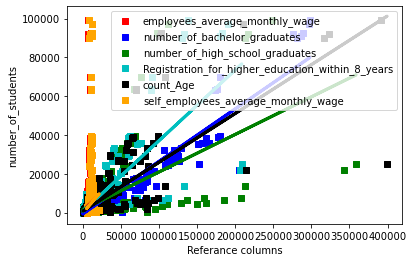

In [382]:
from sklearn import linear_model
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
number_of_students='number_of_graduates_students'

employees_average_monthly_wage='employees_average_monthly_wage'
self_employees_average_monthly_wage	='self_employees_average_monthly_wage'
number_of_bachelor_graduates_in_percent='number_of_bachelor_graduates'
number_of_high_school_graduates_in_percent='number_of_high_school_graduates'
Registration_for_higher_education_within_8_years_in_percent='Registration_for_higher_education_within_8_years'
percent_count_Age='count_Age'

lr = linear_model.LinearRegression() # create a linear regression object
y = final_DataFrame[[number_of_students]].values.reshape(final_DataFrame[number_of_students].shape[0],1)

#print(final_DataFrame)
generateGragh(employees_average_monthly_wage,'r','r')
generateGragh(number_of_bachelor_graduates_in_percent,'blue','blue')
generateGragh(number_of_high_school_graduates_in_percent,'green','green')
generateGragh(Registration_for_higher_education_within_8_years_in_percent,'c','c')
generateGragh(percent_count_Age,'k','k')
generateGragh(self_employees_average_monthly_wage,'orange','orange')

x = final_DataFrame[[percent_count_Age,'employees_average_monthly_wage', 'self_employees_average_monthly_wage',
                     'number_of_bachelor_graduates', 
                     'number_of_high_school_graduates', 
                     'Registration_for_higher_education_within_8_years']]

m = lr.fit(X=x, y=y);

plt.legend(numpoints=1,loc=1)
plt.xlabel('Referance columns')
plt.ylabel('number_of_students')
plt.show()



In [383]:
print("R2:",lr.score(x,y))
print("R2:",r2_score(y,lr.predict(x)))

R2: 0.9515592437478937
R2: 0.9515592437478937


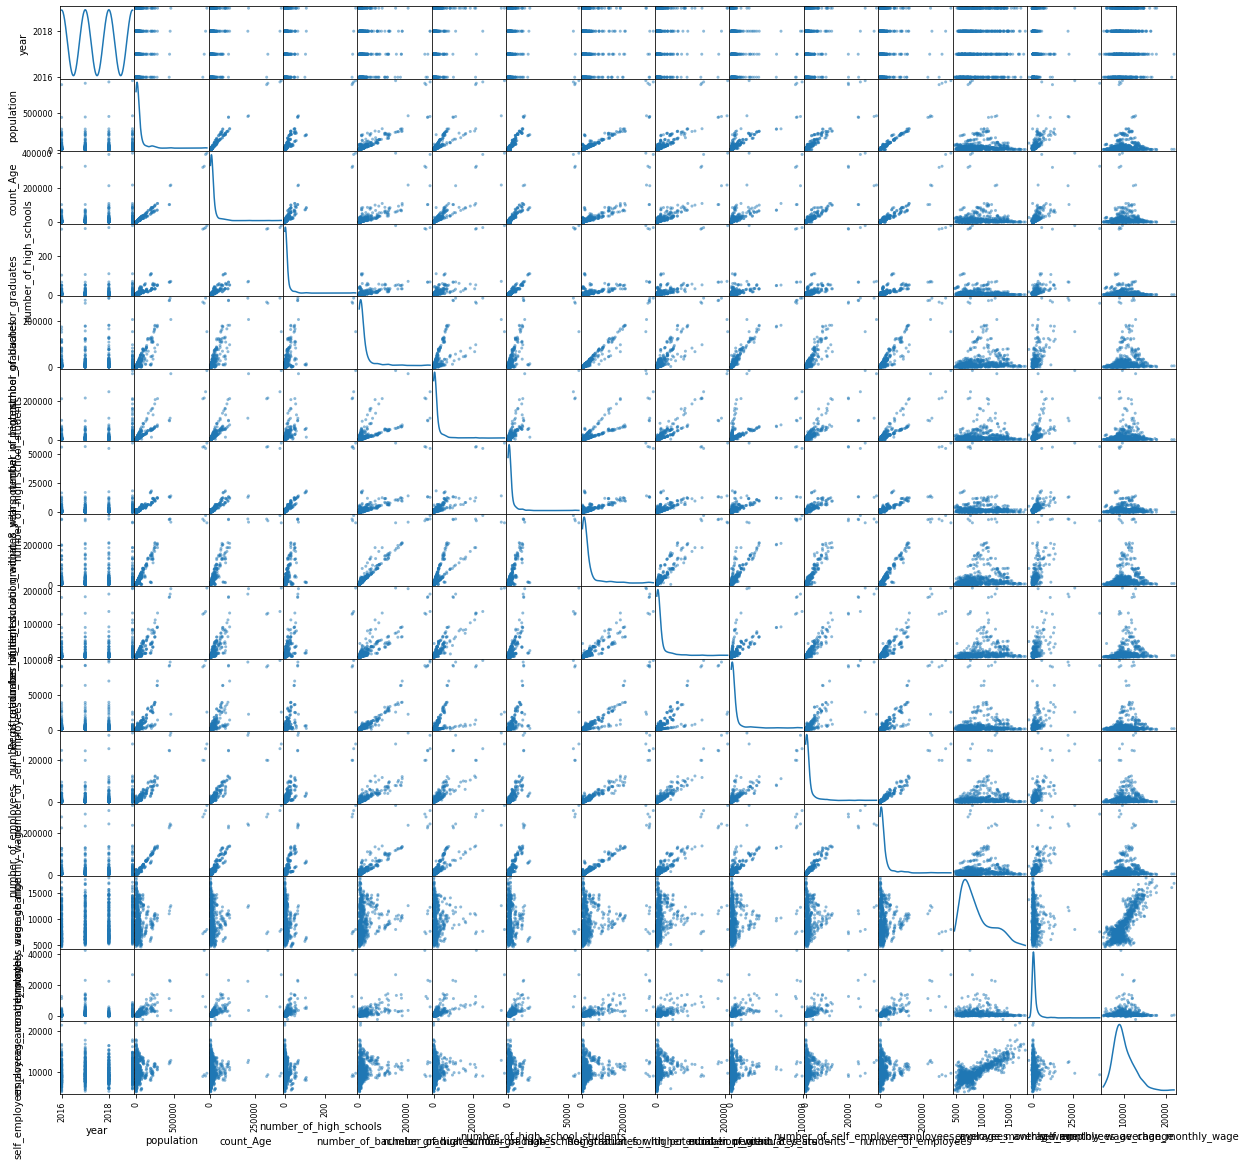

In [384]:
#print(final_DataFrame.corr())
pd.plotting.scatter_matrix(final_DataFrame, figsize=(20, 20), diagonal='kde')
plt.show()

In [385]:
number_of_student = final_DataFrame[final_DataFrame['number_of_high_school_graduates_in_percent']]['city'].value_counts()
number_of_student = number_of_student.astype(float)


# plot labels indicating the number of leagues
for i, value in enumerate(number_of_student):
     plt.text(value, i, str(value), horizontalalignment='right', verticalalignment='center', weight='bold', color='white', fontsize=14)

# plot the results using an horizontal bar plot
number_of_student.plot(kind='barh')

# ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('Number of leagues', fontsize=14)
plt.ylabel('Football teams', fontsize=14)
plt.title('Spanish league winners', fontsize=20);

KeyError: 'number_of_high_school_graduates_in_percent'